# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.model_selection import train_test_split

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

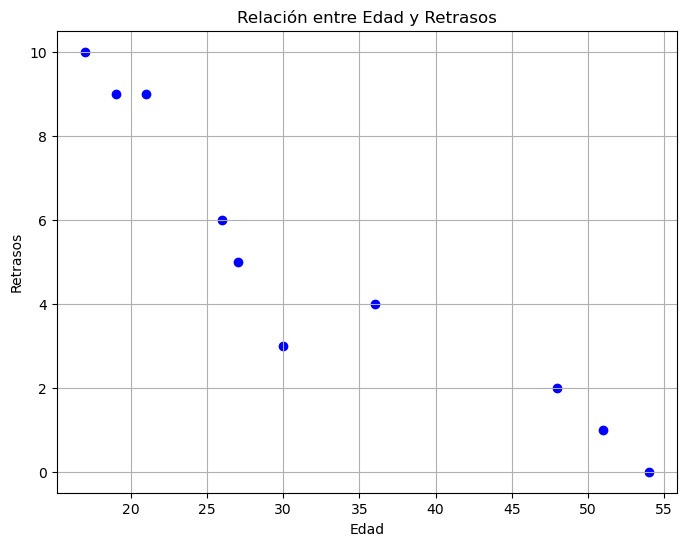

In [4]:
# Creamos el scatter plot y definimos sus ejes por edad y retrasos
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Edad'], student_data['Retrasos'], color='blue', marker='o')

# damos titulo a los ejes del grafico
plt.title('Relación entre Edad y Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')

# Se muestra el gráfico
plt.grid(True)
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Se logra identificar una tendencia casi descrita o que se podría aproximar a una linea recta decreciente, es decir a menor edad hay mayor frecuencia de retrasos .

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [5]:
# Calculamos la covarianza 
covarianza = student_data.cov().loc['Edad', 'Retrasos']
print(f"Covarianza entre Edad y Retrasos: {covarianza}")

# Calculamos la correlación
correlacion = student_data.corr().loc['Edad', 'Retrasos']
print(f"Correlación entre Edad y Retrasos: {correlacion}")

Covarianza entre Edad y Retrasos: -45.56666666666666
Correlación entre Edad y Retrasos: -0.9391626886887121


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [10]:
# Identificamos variables independientes y dependientes
X = student_data[['Edad']]  # Variable independiente
y = student_data['Retrasos']  # Variable dependiente

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# realizar  predicciones
y_pred = model.predict(X)

# Calcular métricas de rendimiento
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R²): {r2}')

Error cuadrático medio (MSE): 1.3319201847356268
Coeficiente de determinación (R²): 0.8820265558250109


Grafica tu modelo de regresión en tu diagrama de dispersión.

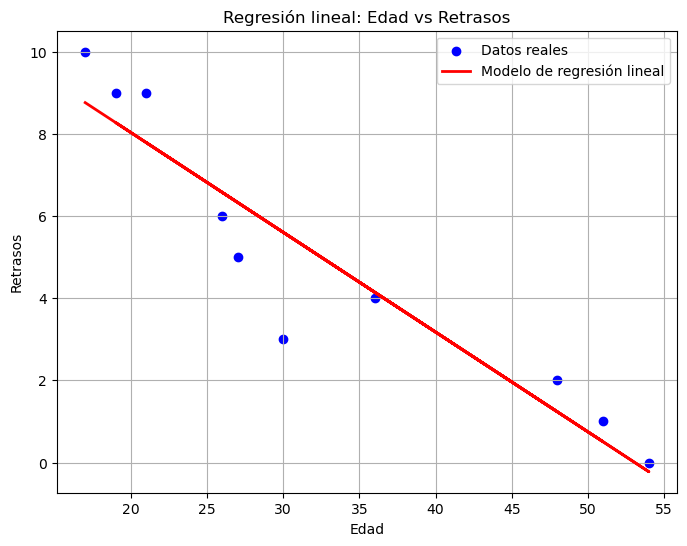

In [8]:
# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Edad'], student_data['Retrasos'], color='blue', label='Datos reales')
plt.plot(student_data['Edad'], y_pred, color='red', linewidth=2, label='Modelo de regresión lineal')
plt.title('Regresión lineal: Edad vs Retrasos')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()
plt.grid(True)
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

el modelo de regresion lineal con un R2= 0.88 confirma un buen ajuste del modelo , por lo que podemos concluir que la edad es buen predictor de la tardanza.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [13]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

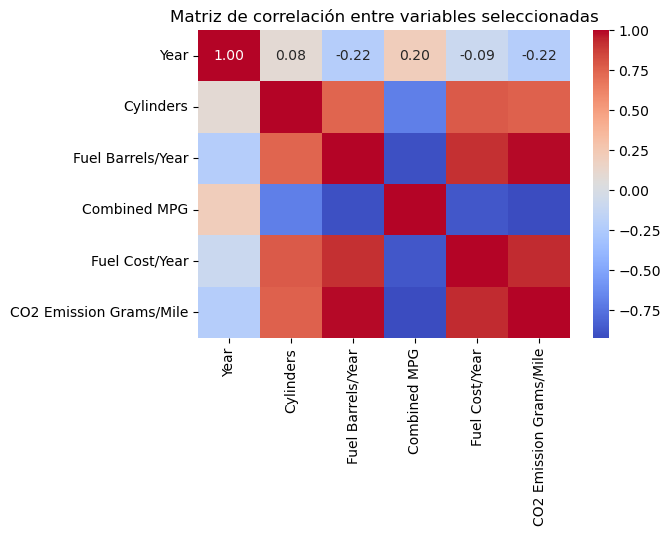

Correlaciones con 'CO2 Emission Grams/Mile':
Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Correlaciones ordenadas:
Fuel Barrels/Year    0.986189
Fuel Cost/Year       0.930865
Cylinders            0.752393
Year                -0.222300
Combined MPG        -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64


In [17]:
# Seleccionar las variables de interés
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
selected_data = vehicles[variables]

# Calcular la matriz de correlación
correlation_matrix = selected_data.corr()

# imprimimos la matriz de correlación
print(correlation_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables seleccionadas')
plt.show()
# Correlaciones específicas con 'CO2 Emission Grams/Mile'
correlations_with_co2 = correlation_matrix['CO2 Emission Grams/Mile'].drop('CO2 Emission Grams/Mile')
print("Correlaciones con 'CO2 Emission Grams/Mile':")
print(correlations_with_co2)

# Ordenamos las correlaciones de mayor a menor
sorted_correlations = correlations_with_co2.sort_values(ascending=False)
print("\nCorrelaciones ordenadas:")
print(sorted_correlations)

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

MAE: 7.449672863378654
MSE: 289.8277440813781
RMSE: 17.02432800674899
R²: 0.9794542628636334
                   Coefficient
Year                 -0.315587
Cylinders             1.794026
Fuel Barrels/Year    19.231027
Combined MPG         -2.933573
Fuel Cost/Year        0.031971


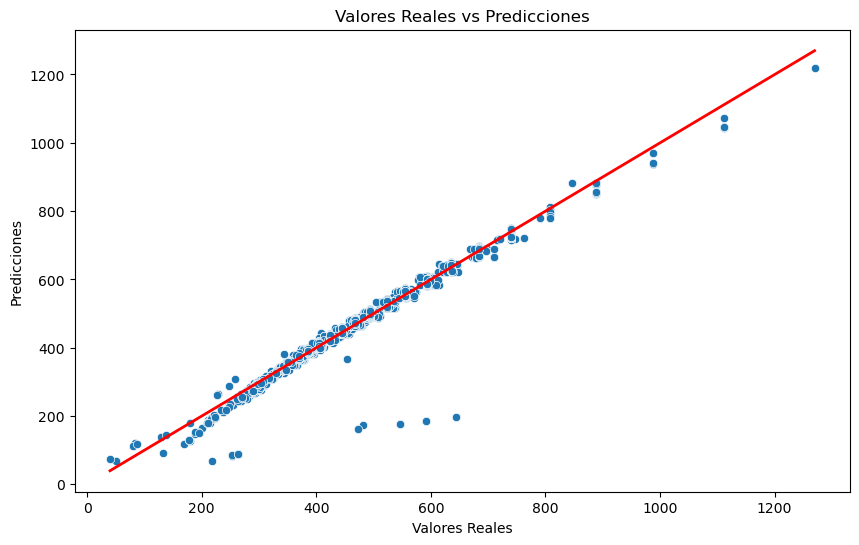

In [24]:
# División en características (X) y variable objetivo (y)
X = selected_data.drop('CO2 Emission Grams/Mile', axis=1)
y = selected_data['CO2 Emission Grams/Mile']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = linear_model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

# Coeficientes del modelo
coef_df = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

# En este caso, estamos utilizando una regresión lineal múltiple.
# La regresión lineal múltiple se emplea cuando se quiere predecir el valor de una variable dependiente basándonos en más de una variable independiente. En nuestro caso, estamos utilizando varias características como el año, el número de cilindros, los barriles de combustible por año, el MPG combinado y el costo de combustible por año para predecir las emisiones de CO2 (Gramos/Milla).
con un R2 = 0.98 el modelo tiene un excelente ajuste y las variables independientes son convenientes para realizar predicciones sobre las emiciones de co2

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*